![img](http://drive.google.com/uc?export=view&id=1Gi4lNIANsWjxlvikM4h1Xein_PPwhHgM)
# **Introduction to K-means**

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for [k-means can be found here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

![img](http://drive.google.com/uc?export=view&id=12uOIWDlAk5YRgy9FOALfUlK0fVt5JTvH)

In [29]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

#### Data for later in the exercise

In [2]:
url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'
test = pd.read_csv(url)

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](http://drive.google.com/uc?export=view&id=1am-0t4grAQueYP9IMmgV0dC4MHWTKd6h)


## Intuitive K means approach

### Observe the following four methods with a sample dataset:

#### Method 1

![left](http://drive.google.com/uc?export=view&id=1rQsgwmbeKsf9lgAv4onHJQMNqYcXZ1cr)

#### Method 2

![right](http://drive.google.com/uc?export=view&id=1duSB73v8ugD5liZyn5dUeSOgwvAbdgui)

#### Method 3

![top](http://drive.google.com/uc?export=view&id=1ZRa7oAskuwSQxLqEyYQc8FZWjERnQx_e)

#### Method 4

![bottom](http://drive.google.com/uc?export=view&id=1TE62xmACOaux75AlzivcP7tSzR86n8ZE)

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

### Review Data

We will now use the dataset we uploaded earlier:

`url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'`

`test = pd.read_csv(url)`

- This is a sample dataset. 
- Let us assume the data is already scaled.

#### EDA of variables

In [3]:
test.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


#### Introduction of `Kmeans`

In [4]:
model = KMeans(n_clusters=4).fit(test)

In [5]:
model.cluster_centers_

array([[ 32.24301901,  58.90857811],
       [ 69.92418447, -10.11964119],
       [  9.41312839,  10.61562231],
       [ 48.47104367,  60.32573379]])

## Note! 
#### Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

In [6]:
model_setseed = KMeans(n_clusters=4, random_state=10).fit(test)
model_setseed.cluster_centers_

array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

#### **Exercise**: 
- Try running `Kmeans` with different number of `n_clusters`, k=2 through k=7
- Check the `cluster_centers_` 
- Without running any more functions, which number of K is the best?

In [27]:
#Practice code goes here
model5 = KMeans(n_clusters=4, random_state=10).fit(test)
model5.cluster_centers_



array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

## **Part 2**: Choosing the appropriate number of K

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

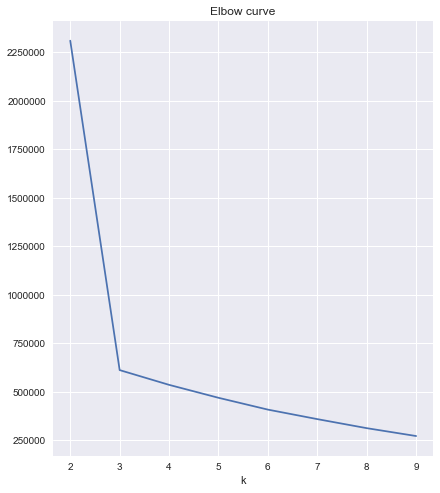

In [8]:
# Specifying the dataset and initializing variables
X = test
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


### **Part 2B**: Silhouette coefficient

In [9]:
# Generate silhouette coefficient for each k
X = test
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

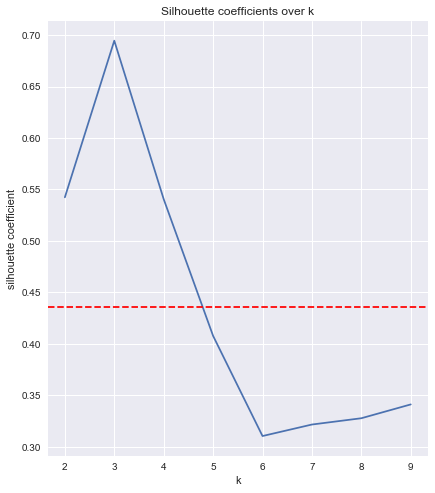

In [10]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

## **Part 3**: **Assumptions** and **challenges** of K-means

- Demonstrate the ideal K-means dataset
- Show three scenarios where K-means struggles

In [11]:
# Create example datasets

# Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

x_messy, labs3 = datasets.make_classification(n_samples=5000,
                                         n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)

In [12]:
# Predict K-Means cluster membership
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)
km_messy2 = KMeans(n_clusters=3, random_state=2).fit(x_messy)

#### Ideal K-means scenario

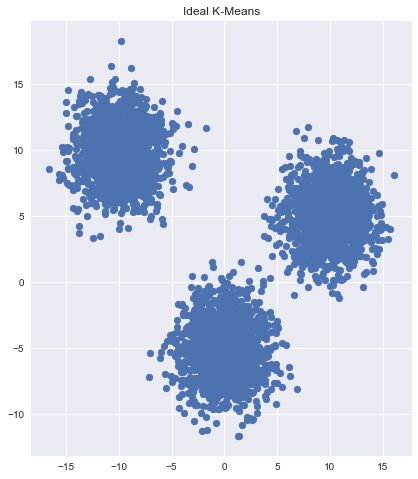

In [13]:
# Ideal K-means scenario
plt.figure(figsize=(15,8))
plt.subplot(121, title='Ideal K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1])

#### Problem Scenario 1

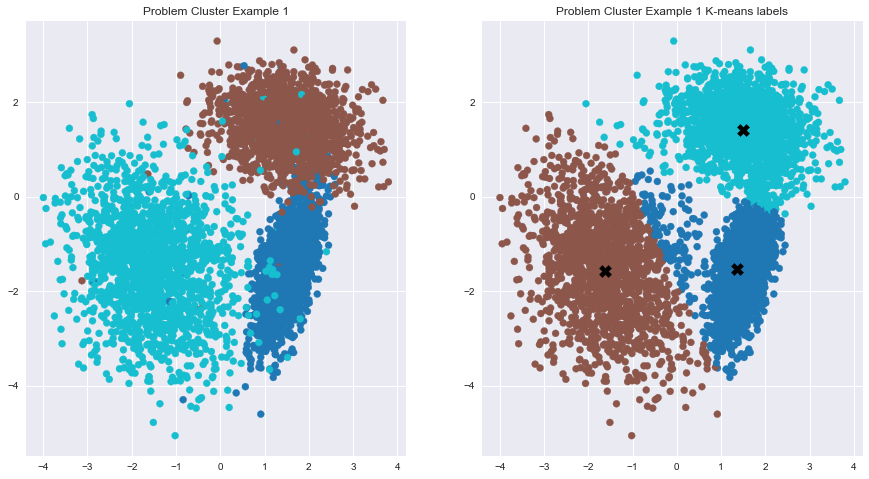

In [14]:
# Problem Scenario 1

plt.figure(figsize=(15,8))
plt.subplot(121, title='Problem Cluster Example 1')
plt.scatter(x_messy[:,0], x_messy[:,1], c=labs3,  cmap=cmap)
plt.subplot(122, title='Problem Cluster Example 1 K-means labels')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)
plt.scatter(km_messy2.cluster_centers_[:,0], km_messy2.cluster_centers_[:,1], marker='X', s=150, c='black')

#### Problem Scenario 2

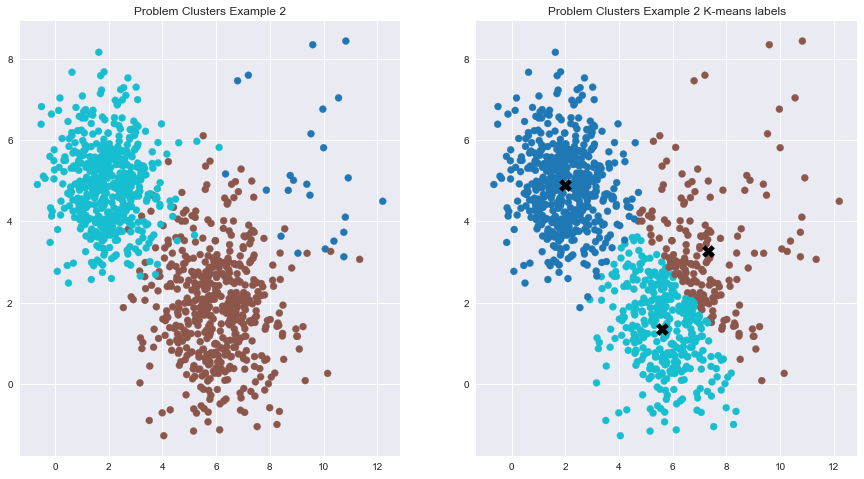

In [15]:
# Problem Scenario 2


# Second toy data set
blob1, y1 = datasets.make_blobs(n_samples=25,
                               centers=[(10,5)],
                               cluster_std=1.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=500,
                               centers=[(6,2)],
                               cluster_std=1.3,
                               random_state=2)

blob3, y3 = datasets.make_blobs(n_samples=500,
                               centers=[(2,5)],
                               cluster_std=1,
                               random_state=2)

unbal = np.vstack([blob1, blob2, blob3])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
y3[y3 == 0] = 2
labs = np.concatenate([y1, y2, y3])

#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=3, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=3, random_state=2).fit_predict(unbal)

plt.figure(figsize=(15,8))
plt.subplot(121, title= 'Problem Clusters Example 2')
plt.scatter(unbal[:,0], unbal[:,1], c=labs, cmap=cmap)
plt.subplot(122, title='Problem Clusters Example 2 K-means labels')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap)
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')

#### Problem Scenario 3

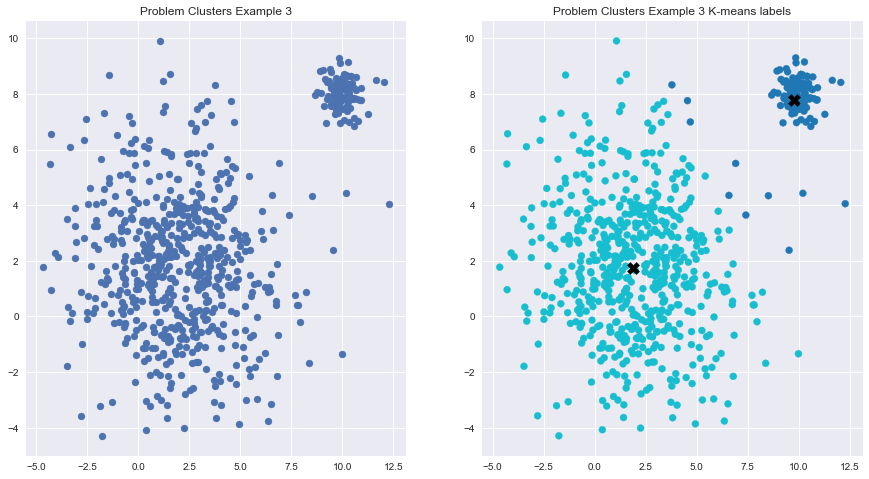

In [16]:
# Problem Scenario 3

# Third toy data set
blob1, y1 = datasets.make_blobs(n_samples=100,
                               centers=[(10,8)],
                               cluster_std=0.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=600,
                               centers=[(2,2)],
                               cluster_std=2.5,
                               random_state=2)


unbal = np.vstack([blob1, blob2])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
labs = np.concatenate([y1, y2])

#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=2, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=2, random_state=2).fit_predict(unbal)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Problem Clusters Example 3')
plt.scatter(unbal[:,0], unbal[:,1])
plt.subplot(122, title='Problem Clusters Example 3 K-means labels')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap)
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')

## Bonus:
### K-means on larger dataset

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`
the link for the dataset can be found here: https://raw.githubusercontent.com/aapeebles/kmeans_flatiron/master/Kmeans%20lesson/Wine.csv


Instructions:
- First, remove customer_segment from the dataset

In [41]:
# Work on problem here:
df = pd.read_csv('https://raw.githubusercontent.com/aapeebles/kmeans_flatiron/master/Kmeans%20lesson/Wine.csv')

In [42]:
target = df.Customer_Segment
df = df.drop(['Customer_Segment'], axis=1)

In [43]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [45]:
target.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

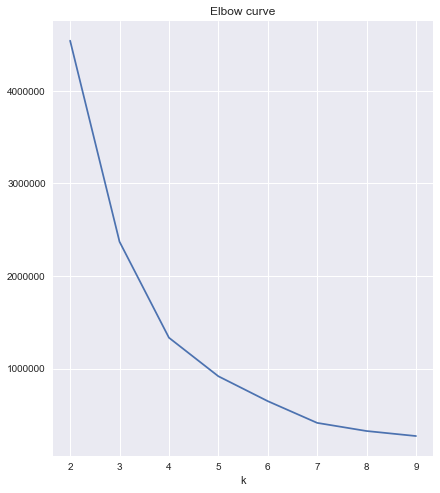

In [50]:
#Elbow method
X = df
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 3080)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

In [37]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

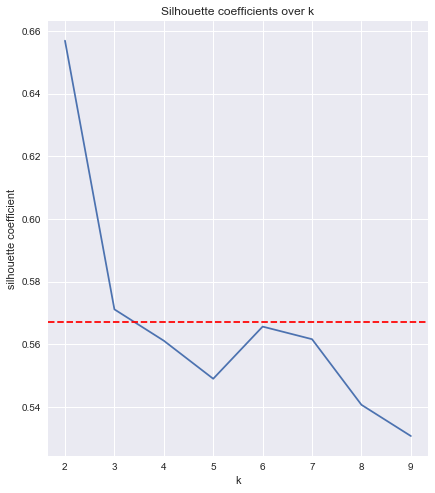

In [51]:
#silhouette
X = df
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=100)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
